In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
!wget https://github.com/forero/abacus/raw/master/data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat

--2019-02-13 21:08:39--  https://github.com/forero/abacus/raw/master/data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/forero/abacus/master/data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat [following]
--2019-02-13 21:08:40--  https://raw.githubusercontent.com/forero/abacus/master/data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.4.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.4.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 779142 (761K) [text/plain]
Saving to: ‘sphere_data_cut_0.dat’

sphere_data_cut_0.d 100%[===================>] 760,88K  1,26MB/s 

In [2]:
seed = 20190213
np.random.seed(seed)
Radius = 100
VOID_TYPE = "REAL"
N = 30000     ################ The double!!!   N_rc = 2 * N_oc

In [3]:
def sph_random_point():
    u = np.random.rand()
    x1 = np.random.normal()
    x2 = np.random.normal()
    x3 = np.random.normal()
    
    norm = np.sqrt( x1**2 + x2**2 + x3**2)
    x1 /= norm
    x2 /= norm
    x3 /= norm
    
    r = Radius * u ** (1/3)
    
    return  [r*x1,r*x2,r*x3] 

In [4]:
RC = np.zeros([N,3])
for x in RC:
    x += sph_random_point()
np.savetxt("rnd_sph_cat_R100_seed20190213.cat", RC)


OC = np.loadtxt("./sphere_data_cut_0.dat")
OC = OC + 400


FC = np.vstack([RC,OC])
np.savetxt("FC_N{}_{}.cat".format(N,VOID_TYPE), FC)

<IPython.core.display.Javascript object>


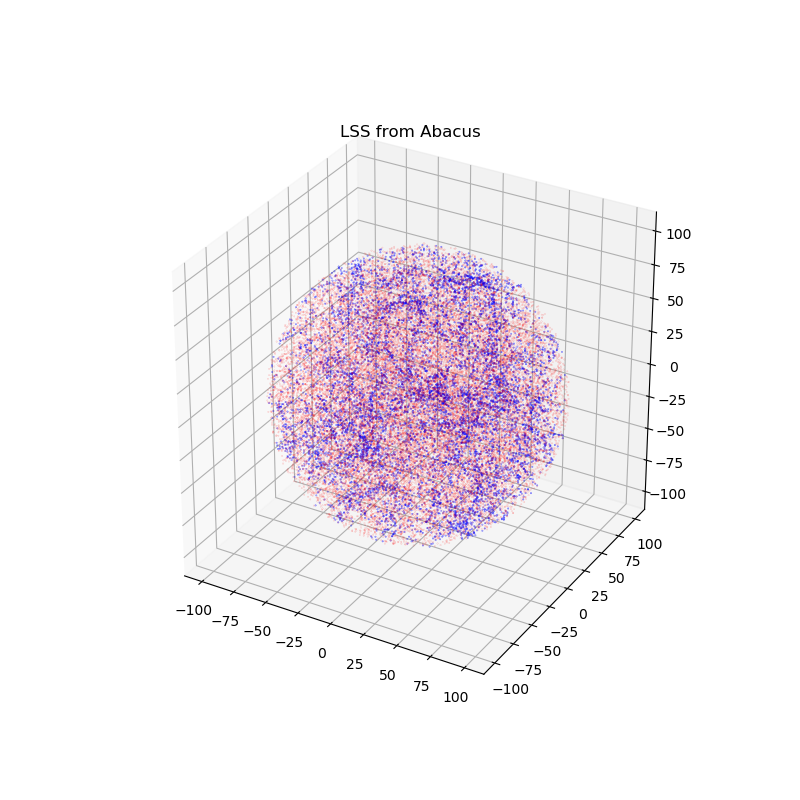

Text(0.5,0.92,'LSS from Abacus')

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


X = OC[:,0]
Y = OC[:,1]
Z = OC[:,2]

ax.scatter(X, Y, Z, c="blue", s=0.1)

X = RC[:,0]
Y = RC[:,1]
Z = RC[:,2]

ax.scatter(X, Y, Z, c="red", s=0.01)


plt.title("LSS from Abacus")




In [7]:
!make NPARTICLES=$N VOID_TYPE=$VOID_TYPE 

Input File FC_N30000_REAL.cat
cp FC_N30000_REAL.cat lFY2xsjorr

Calling NGL
/home/filipo/master_thesis/ngl-beta/build/binsrc/./getNeighborGraph -i lFY2xsjorr -d 3 -m BSkeleton -b 1.0c > FC_N30000_REAL_Beta1.0.bsk
Ellapsed time: 14259.599609 s.
Output file: FC_N30000_REAL_Beta1.0.bsk
Deleting auxiliar file
rm lFY2xsjorr


In [6]:
!ls -lt

total 31296
-rw-rw-r-- 1 filipo filipo 3058437 feb 20 15:11 FC_N30000_REAL.cat
-rw-rw-r-- 1 filipo filipo 2294873 feb 20 15:11 rnd_sph_cat_R100_seed20190213.cat
-rw-rw-r-- 1 filipo filipo 2698168 feb 20 15:06 abacus_first_test.ipynb
-rw-rw-r-- 1 filipo filipo 5474653 feb 20 15:04 tagging_voids.pdf
-rw-rw-r-- 1 filipo filipo 3720800 feb 20 15:02 BS_of_Voids.bsk
-rw-rw-r-- 1 filipo filipo 3427424 feb 19 21:39 FC_N30000_REAL_Beta1.0.bsk
-rw------- 1 filipo filipo 3058437 feb 19 17:28 T3mVhJAuYW
-rw-rw-r-- 1 filipo filipo  910622 feb 19 17:26 void_masterlist_N30000.cat
-rw-rw-r-- 1 filipo filipo  910622 feb 19 17:26 void_masterlist_N20000.cat
-rw-rw-r-- 1 filipo filipo  910622 feb 19 17:26 void_masterlist_N10000.cat
-rw-rw-r-- 1 filipo filipo 2293399 feb 19 17:23 FC_N20000_REAL.cat
-rw-rw-r-- 1 filipo filipo 2474342 feb 13 22:38 FC_N20000_REAL_Beta1.0.bsk
-rw-rw-r-- 1 filipo filipo  779142 feb 13 21:08 sphere_data_cut_0.dat
-rw-rw-r-- 1 filipo filipo     762 feb 13 21:05 Makefile
-rw-rw-r-

# Loading the Full Catalog Beta-Skeleton graph

In [7]:
fcBSkel = np.loadtxt("FC_N{}_REAL_Beta1.0.bsk".format(str(N)))
fcBSkel.shape

(299912, 2)

In [8]:
index = np.where(fcBSkel[:,0] < N)

first_filter = np.array(fcBSkel[index]).astype(int)


In [9]:
print(N)

index = np.where( first_filter[:,1] >= N )[0]

droplist_raw = first_filter[index,0]
droplist = set(droplist_raw)

print( "First filter shape:", first_filter.shape, 
      "\nHow many of them have direct connections with galaxies", len(droplist) )

30000
First filter shape: (231985, 2) 
How many of them have direct connections with galaxies 19651


In [10]:
rndmcat_index = set(range(N))

candidates = rndmcat_index.difference(droplist)
candidates = list(candidates)
void_cat = FC[candidates]

<IPython.core.display.Javascript object>


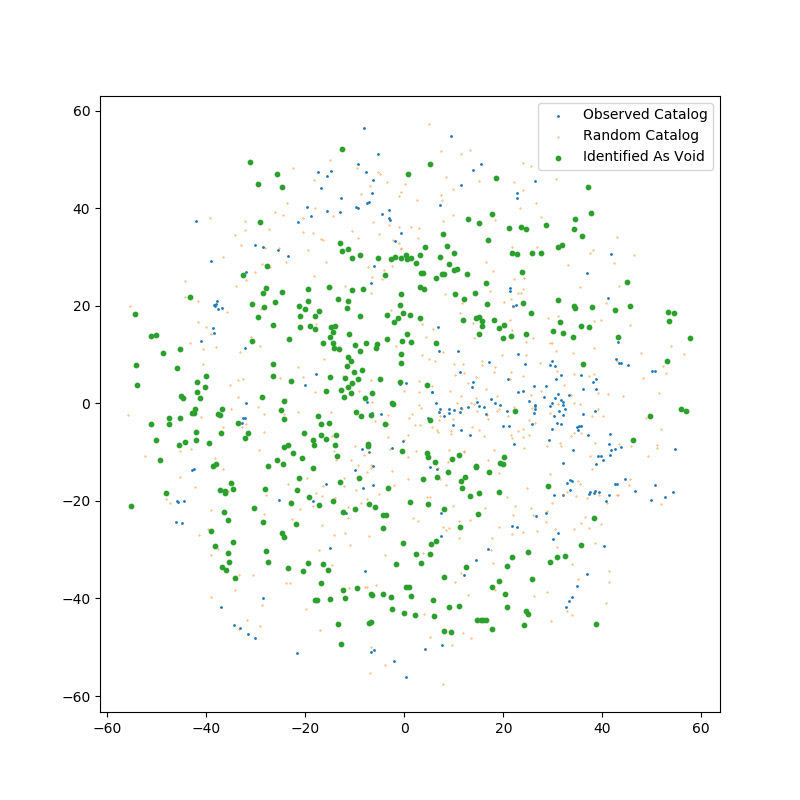

<IPython.core.display.Javascript object>


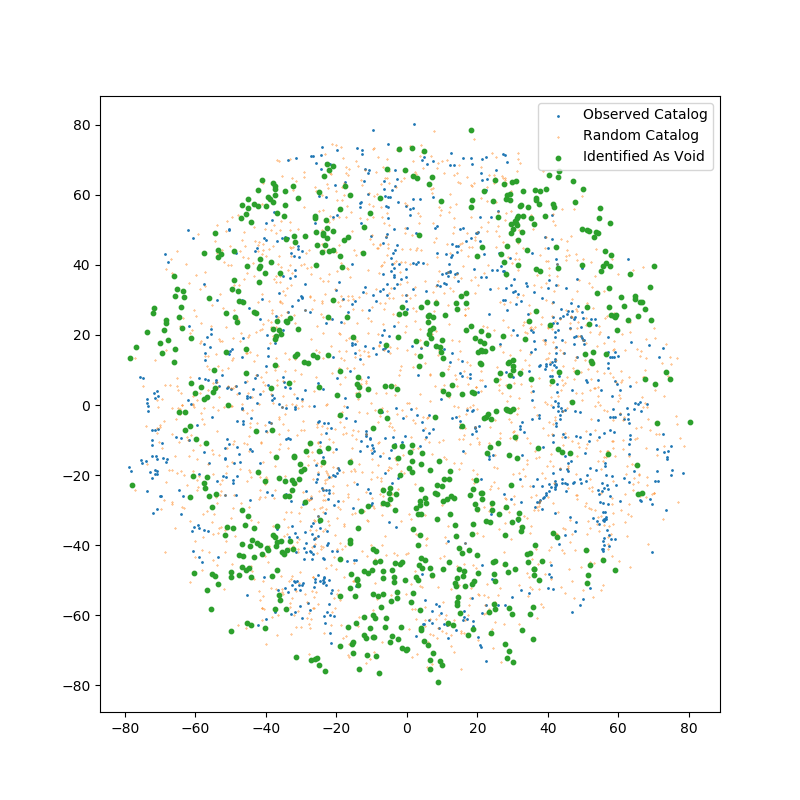

<IPython.core.display.Javascript object>


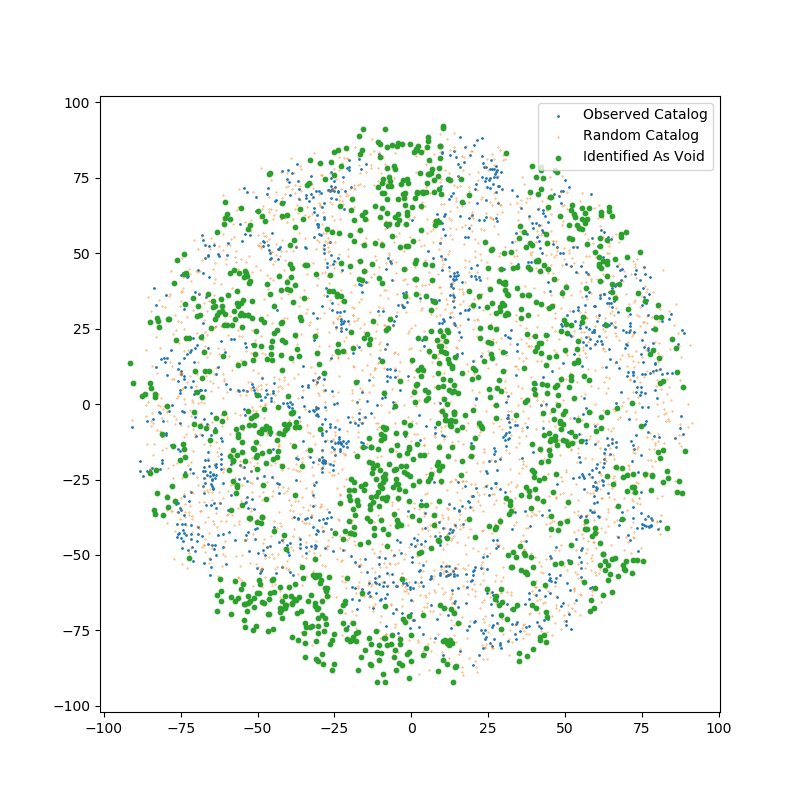

<IPython.core.display.Javascript object>


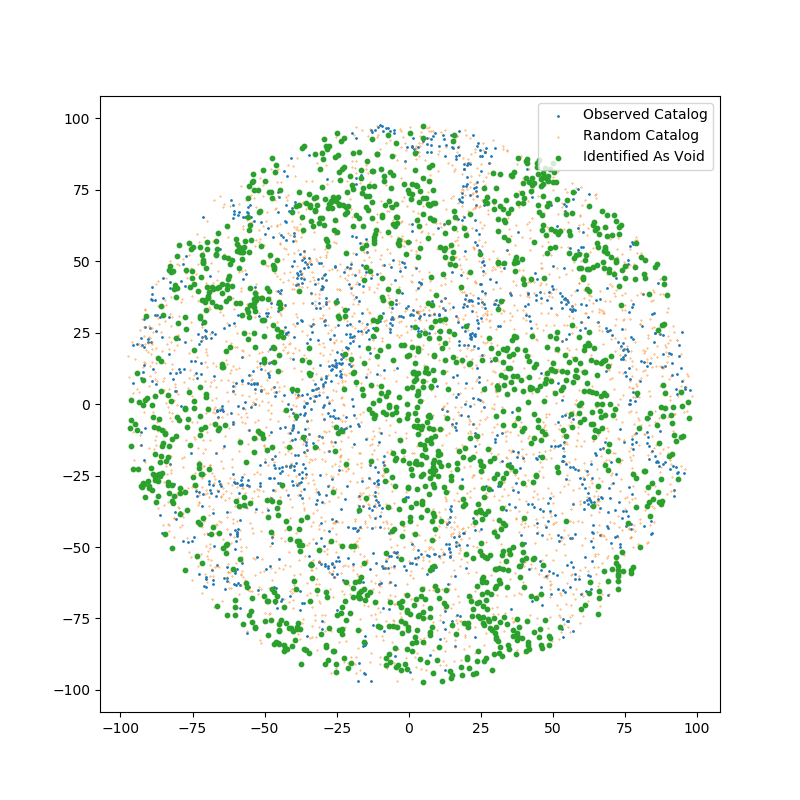

<IPython.core.display.Javascript object>


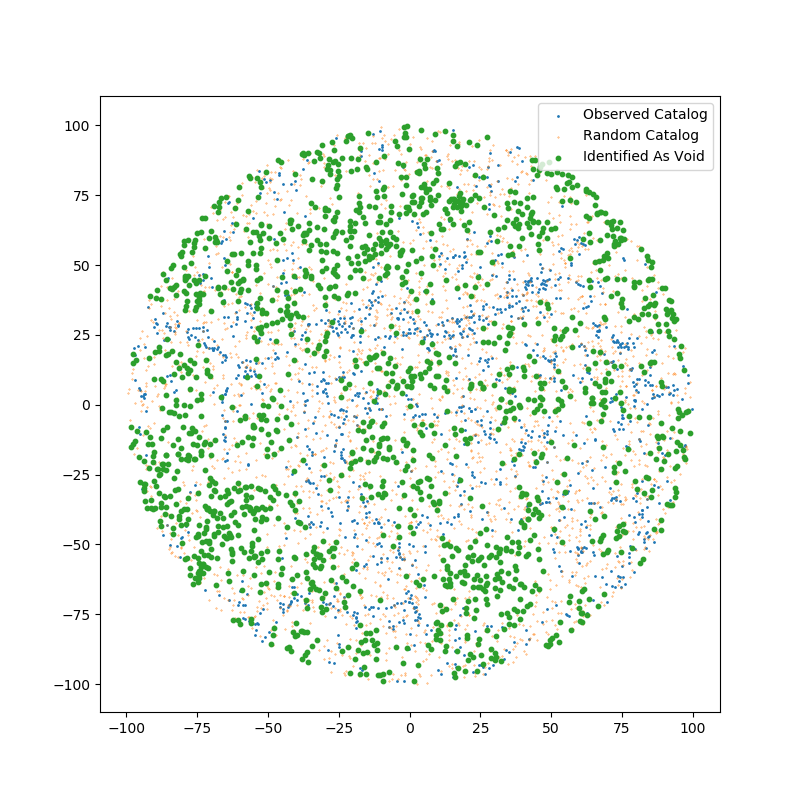

<IPython.core.display.Javascript object>


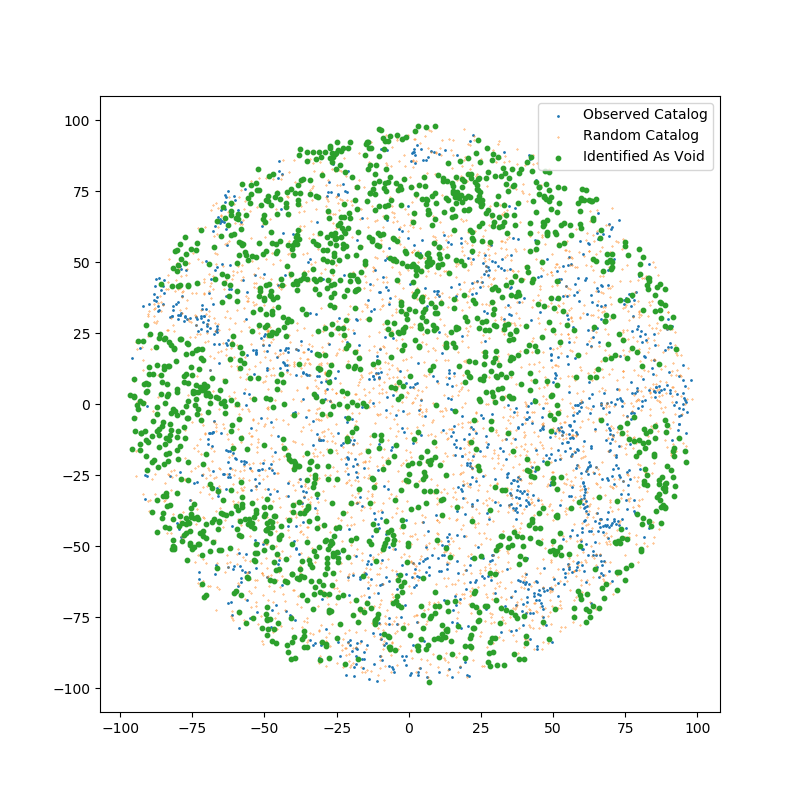

<IPython.core.display.Javascript object>


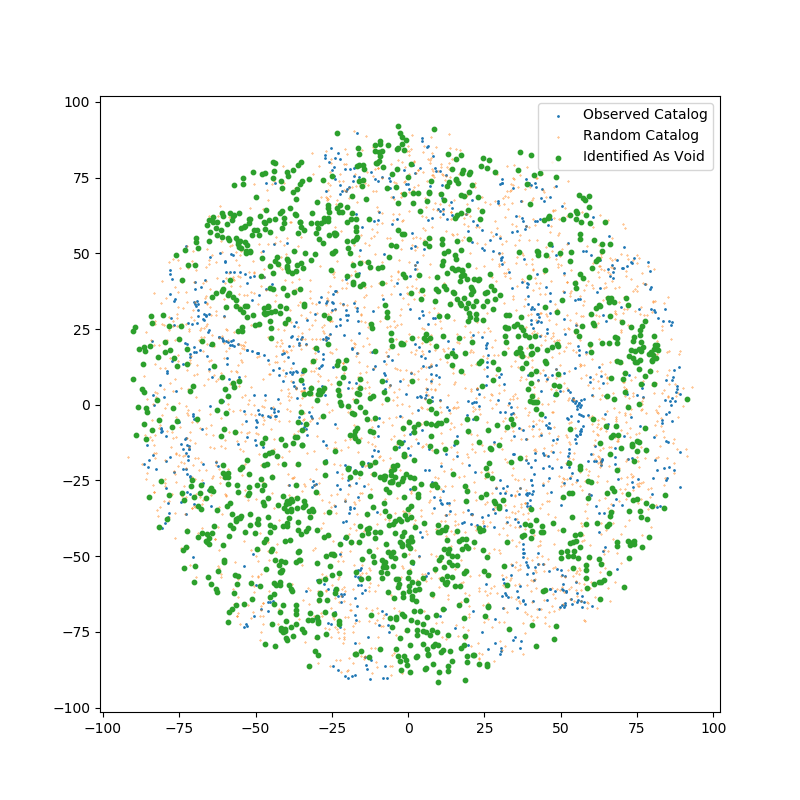

<IPython.core.display.Javascript object>


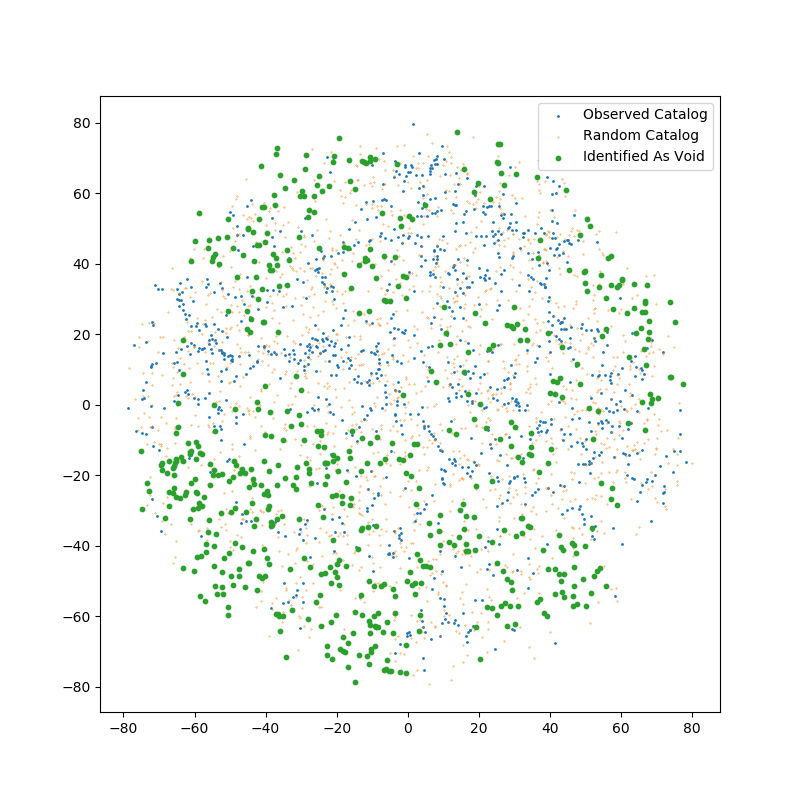

<IPython.core.display.Javascript object>


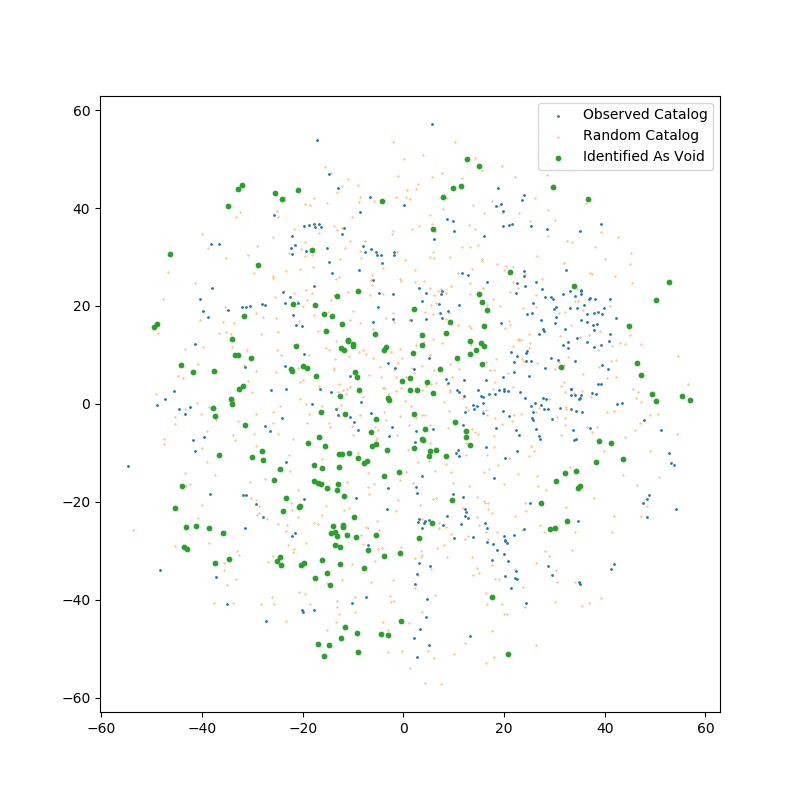

In [11]:
for k in np.linspace(-90,90,9):
    slice_height = 10
    BoxCenter = k

    fig = plt.figure(figsize=[8,8])

    index = np.where( abs(OC[:,2] - BoxCenter) < slice_height )        
    plt.scatter(OC[index,0], OC[index,1], s=1, label="Observed Catalog")

    index = np.where( abs(RC[:,2] - BoxCenter) < slice_height )        
    plt.scatter(RC[index,0], RC[index,1], s=0.1, label="Random Catalog")

    index = np.where( abs(void_cat[:,2] - BoxCenter) < slice_height )        
    plt.scatter(void_cat[index,0], void_cat[index,1], s=10, label="Identified As Void")

    plt.legend(loc=1)

<IPython.core.display.Javascript object>


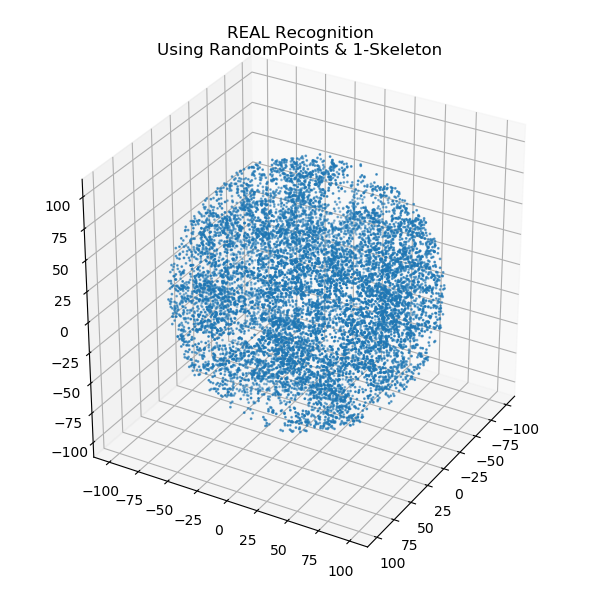

In [12]:
x = void_cat[:,0]
y = void_cat[:,1]
z = void_cat[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(x, y, z, s=1)
ax.view_init(30, 30)

plt.title(VOID_TYPE +" Recognition" + "\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()

#plt.close()

plt.show()


In [13]:
index=[]

for k in candidates:
    index.extend( list( np.where( fcBSkel[:,0] == k)[0].astype(int) ) )

index = list(set(index ) )
index.sort()

# Beta-Skeleton of Voids
VoidsBS = np.array(fcBSkel[index]).astype(int)
print(VoidsBS.shape)
print(len(candidates))

(74416, 2)
10349


In [14]:
np.savetxt("BS_of_Voids.bsk", VoidsBS)

In [15]:
candidates.sort()

In [16]:
MasterList = []

for search in candidates:
    
    is_in_master = any( search in sublist for sublist in MasterList)

    #print ( "Is", search, "in MasterList?", is_in_master)
    
    # If is the first time it appears on the MasterList
    if not is_in_master:
        my_list = []

        index = np.where(VoidsBS[:,0] == search)
        my_list.append(search)
        my_list.extend( list(VoidsBS[index,1][0]) )
        my_list.sort()
        MasterList.append(my_list)

    if is_in_master:
        repetitions = []
        
        for k in range(len(MasterList)):
            if(search in MasterList[k]):
                sublist = MasterList[k]
                #print("Si está en la sublista", k, sublist)
                repetitions.append(k)
                
        #print(search, "appears in sublists:" , repetitions)
        

        if ( len(repetitions) == 1 ):
            j = repetitions[0]
            index = np.where(VoidsBS[:,0] == search)
 
            #print("Index:", index)
            my_list = list(VoidsBS[index,1][0])
            my_list.sort()
            MasterList[j].extend(my_list)
        
        elif (len(repetitions) > 1):
            # print("Friend of many friends, n=", len(repetitions))
            my_list = []
            for j in repetitions:
                my_list.extend(MasterList[j])
                MasterList[j]=[]
            my_list.sort()
            MasterList.append(my_list)
            
while( [] in MasterList):
    MasterList.remove([])

In [17]:
for j in range(len(MasterList)):
    MasterList[j] = list( set(MasterList[j]))
    MasterList[j].sort()

In [18]:
to_merge = []

for i in range(len(MasterList)):
    for j in range(len(MasterList)):
        if (j > i):
            aux = [x for x in MasterList[i] if x in MasterList[j]]
            if (len(aux)>0):
                # print( i, j, aux)
                to_merge.append([i,j])

In [19]:
to_merge2 = []
for i in range( len(to_merge)):
    x = to_merge[i][0]
    y = to_merge[i][1]
    
    is_in_list1 = any( x in sublist for sublist in to_merge2 )
    is_in_list2 = any( y in sublist for sublist in to_merge2 )
    
    if( (is_in_list1 == False) & (is_in_list2 == False) ):
        to_merge2.append(to_merge[i])
    
    elif( (is_in_list1 == False) & (is_in_list2 == True) ):
            aux = []
            for j in range(len(to_merge2)):
                if( y in to_merge2[j]):
                    to_merge2[j].append(x)

    elif( (is_in_list1 == True) & (is_in_list2 == False) ):
            aux = []
            for j in range(len(to_merge2)):
                if( x in to_merge2[j]):
                    to_merge2[j].append(y)

    
for x in to_merge2:
    x.sort()
    
print( to_merge2)

[[0, 3, 6, 27, 28, 30, 31, 34, 38, 39, 40, 42, 46, 49, 51, 57, 58, 64, 68, 69, 70, 76, 77, 80, 88, 90, 93, 99, 102, 103, 105, 108, 109, 113, 116, 117, 118, 123, 125, 126, 131, 135, 138, 142, 144, 145, 146, 152, 158, 159, 160, 161, 162, 171, 172, 180, 181, 187, 193, 197, 203, 207, 209, 218, 220, 224, 228, 229, 231, 233, 234, 236, 238, 243, 247, 248, 249, 250, 253, 254, 255, 256, 257, 260, 261, 262, 271, 281, 285, 287, 288, 292, 293, 296, 304, 307, 311, 317, 318, 322, 326, 327, 334, 340, 346, 354, 366, 367, 369, 372, 381, 383, 386, 393, 397, 404, 409, 411, 412, 417, 421, 434, 436, 437, 441, 444, 449, 450, 453, 458, 459, 460, 461, 462, 463, 464, 467, 471, 478, 489, 491, 492, 505, 511, 519, 520, 521, 522, 524, 525, 526, 527, 529, 531, 533, 535, 536, 543, 549, 553, 557, 567, 569, 572, 573, 580, 584, 588, 597, 598, 600, 602, 603], [1, 5, 447, 590], [2, 232, 356, 451], [4, 35], [7, 221, 226], [8, 95, 167, 407, 408, 415, 493, 560], [9, 48, 212, 594], [10, 349], [11, 22], [12, 24, 502], [13, 21

In [20]:
for sublist in to_merge2:
    aux = []
    for x in sublist:
        aux.extend(MasterList[x])
        MasterList[x] = []
    aux.sort()
    MasterList.append(aux)
    
while( [] in MasterList):
    MasterList.remove([])
    

colors = cm.rainbow( np.linspace(0,1, len(MasterList)))



<IPython.core.display.Javascript object>


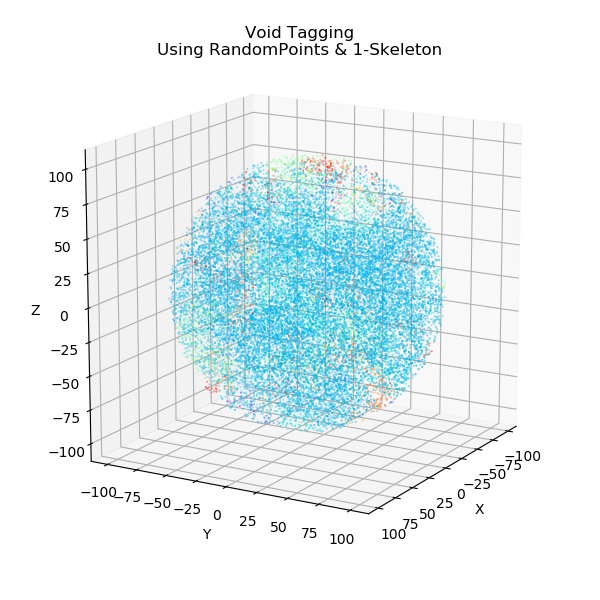

In [21]:
x = RC[:,0]
y = RC[:,1]
z = RC[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

for k in range(len(MasterList)): 
    void = MasterList[k]
    ax.scatter(x[void], y[void], z[void], s=0.1, c=colors[k])

ax.view_init(15, 30)

plt.title("Void Tagging\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()


plt.savefig("./tagging_voids.pdf", format="pdf")
#plt.close()

plt.show()

In [22]:
print("Total number of Void Particles", len(candidates))

aux = 0
for halo in MasterList:
    # print( len(halo))
    aux += len(halo)

print("Total number of particles in halos:", aux , "(Void + Frontier particles)")

Total number of Void Particles 10349
Total number of particles in halos: 24967 (Void + Frontier particles)


In [23]:

X = RC[:,0]
Y = RC[:,1]
Z = RC[:,2]

with open("void_masterlist_N30000.cat", 'w') as file:
    
    for halo in MasterList:   
        for particle in halo:
            line  = str(MasterList.index(halo)) + ", " 
            line += str(X[particle]) + ", " 
            line += str(Y[particle]) + ", " 
            line += str(Z[particle] ) + "\n"

            file.write(line)

In [25]:
print( len(MasterList))

164
